In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [2]:
# let’s import our necessary libraries.
#import the necessary liblaries
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Statistical data visualization

# Warnings module for handling warnings in Python
import warnings
# tqdm for adding progress bars to loops, with notebook module for Jupyter notebooks
from tqdm.notebook import tqdm
# Suppressing warnings to keep the output clean
warnings.filterwarnings('ignore')
# Jupyter magic command for inline plotting with Matplotlib
%matplotlib inline


In [3]:
# Tensorflow and Keras Modules
import tensorflow as tf
# Importing load_img from Keras for loading images
from keras.preprocessing.image import load_img
# Importing Sequential, Model, and various layers from Keras for building neural networks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

2024-05-09 16:09:54.160694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 16:09:54.160829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 16:09:54.332935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:

# Let’s read the images in the dataset and store them in a dataframe.
#directory
BASE_DIR = '/kaggle/input/utkface-new/UTKFace'

## Read the images in the dataset and store them in a dataframe

In [5]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

#create a loop for all dataset images
for filename in (os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

## Store all this data in a dataframe

In [6]:

# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  /kaggle/input/utkface-new/UTKFace/26_0_2_20170...   26       0
1  /kaggle/input/utkface-new/UTKFace/22_1_1_20170...   22       1
2  /kaggle/input/utkface-new/UTKFace/21_1_3_20170...   21       1
3  /kaggle/input/utkface-new/UTKFace/28_0_0_20170...   28       0
4  /kaggle/input/utkface-new/UTKFace/17_1_4_20170...   17       1

In [7]:
# change the label of the gender
gender_dict = {0:'Male', 1:'Female'}

## Viewing a sample

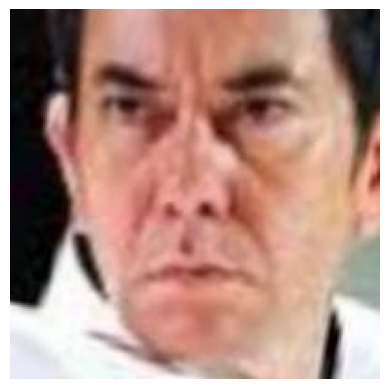

In [8]:
#import pillow lib
from PIL import Image
#open the second image
img = Image.open(df['image'][6])
plt.axis('off')
#show it
plt.imshow(img);

## Plotting The age distribution

<Axes: xlabel='age', ylabel='Count'>

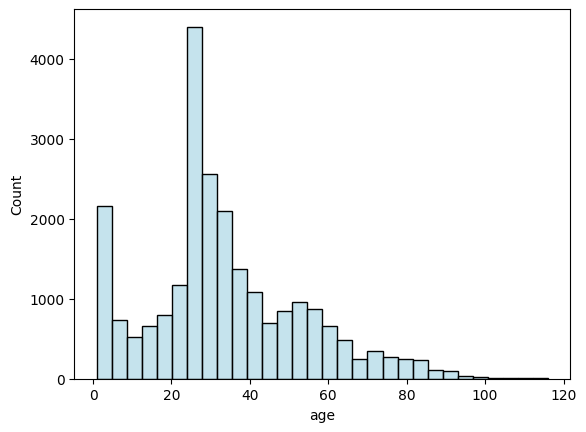

In [9]:
#check the age distribution
sns.histplot(df['age'], bins=30, color='lightblue', alpha=0.7)

## Plotting the No. of Male and Female Samples

gender
0    12391
1    11317
Name: count, dtype: int64


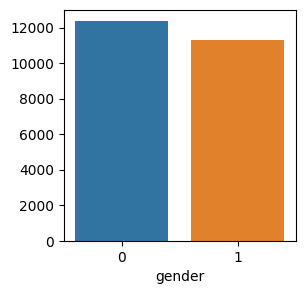

In [10]:
# the vast majority between the ages of 25 and 30

# Count plot of gender 
gender_count = df['gender'].value_counts()
print(gender_count)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(x= gender_count.index, y= gender_count.values, ax=ax)

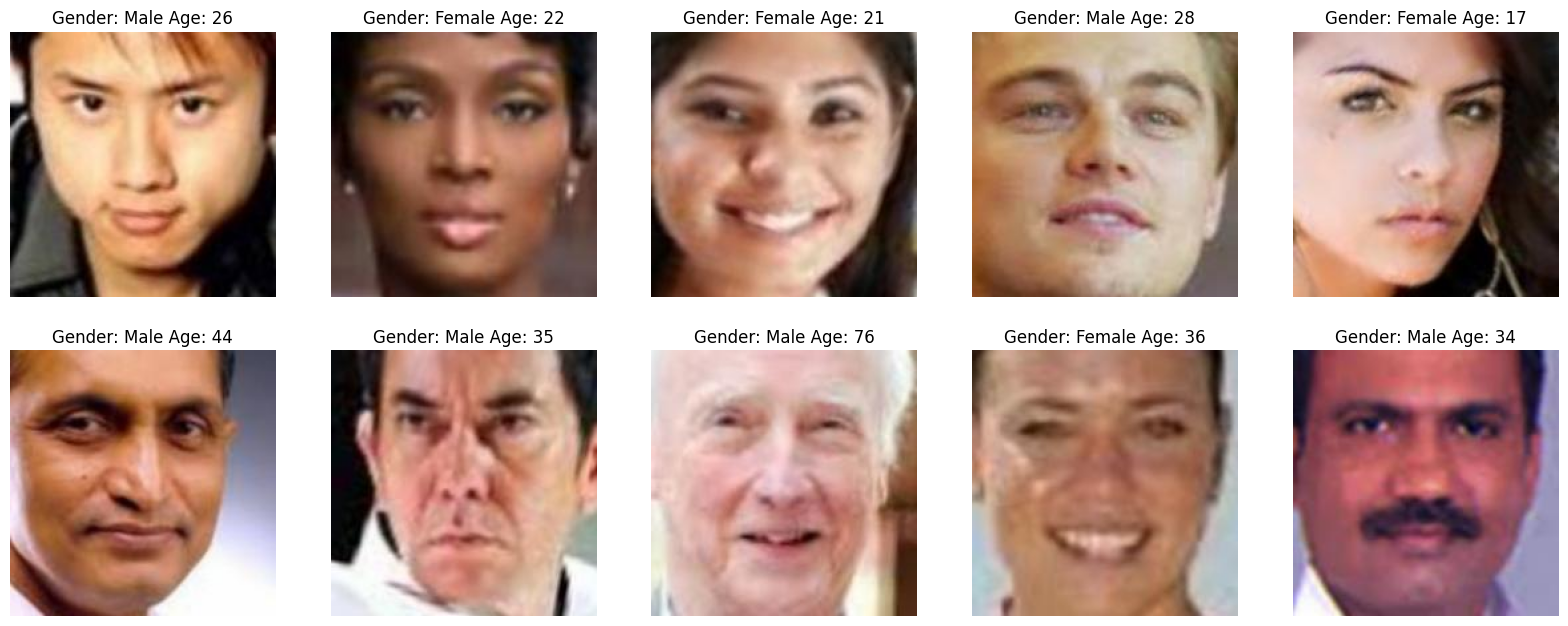

In [11]:
# Show some examples of people images

#show some examples
plt.figure(figsize=(20, 20))
# Select the first 25 rows from the DataFrame
files = df.iloc[0:10]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1) #Create a subplot in a 5 x 5 grid
    img = load_img(file) # Load the image using the file path
    img = np.array(img) # Convert the image to a NumPy array
    plt.imshow(img) # Display the image
    plt.title(f"Gender: {gender_dict[gender]} Age: {age}")   # Set the title with age and gender information
    plt.axis('off') # Set the title with age and gender information# Turn off axis labels for cleaner visualization

plt.show()

In [12]:
# Let’s resize our images to 128*128 and make some adjustments.

def extract_features(images):
    features = []
    for image in images:
        # change to gray image
        img = load_img(image, color_mode="grayscale")
        # img = load_img(filename, color_mode="grayscale", target_size=None,interpolation='nearest') 
        #resize by 128*128
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    
    return features

In [13]:
# extract it and check shape

X = extract_features(df['image'])
X.shape

(23708, 128, 128, 1)

In [14]:
# make normalisation 0-1
X = X/255.0

In [15]:
# create age and gender for prediction

y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

print(y_age)

[26 22 21 ...  2 65 66]


## Defining  and createing the Model

In [16]:

input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))

# Convolutional layers with max pooling
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

# Flatten and dense layers
flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

# Dropout layers with a dropout rate of 0.3 for regularization
dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# Output layers for gender and age
# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

# Compile the model with Adam optimizer and appropriate losses
model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 12, 12,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 9216)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │        257 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

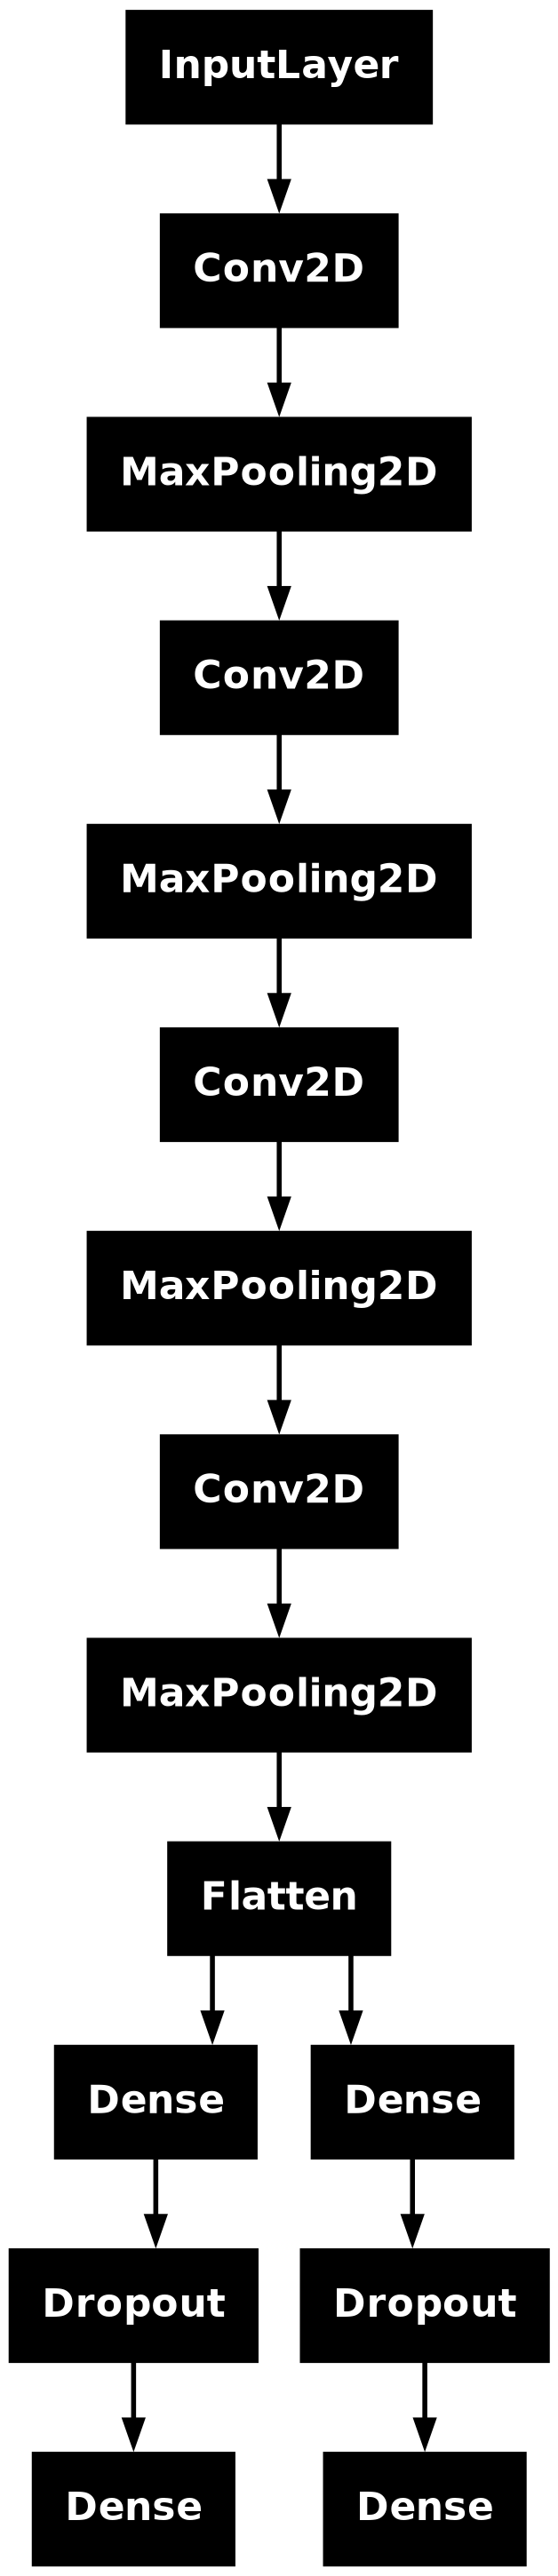

In [18]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

## Running the Model

In [19]:
# Let’s train the model with batch size is 64 and epoch is 30 with 20% validation split
history = model.fit(x=X, y=[y_gender, y_age], batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
  3/297 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - age_out_mae: 31.1562 - gender_out_accuracy: 0.4115 - loss: 31.9377   

I0000 00:00:1715271128.192301      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715271128.212663      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - age_out_mae: 17.0134 - gender_out_accuracy: 0.5080 - loss: 17.7286

W0000 00:00:1715271145.383702      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715271146.856713      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - age_out_mae: 17.0080 - gender_out_accuracy: 0.5080 - loss: 17.7232 - val_age_out_mae: 13.4633 - val_gender_out_accuracy: 0.5879 - val_loss: 14.1107
Epoch 2/30
  5/297 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - age_out_mae: 14.1239 - gender_out_accuracy: 0.6153 - loss: 14.7324

W0000 00:00:1715271148.566371      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - age_out_mae: 12.6470 - gender_out_accuracy: 0.7060 - loss: 13.2135 - val_age_out_mae: 10.0249 - val_gender_out_accuracy: 0.7870 - val_loss: 10.4942
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - age_out_mae: 10.1343 - gender_out_accuracy: 0.7759 - loss: 10.6055 - val_age_out_mae: 8.8747 - val_gender_out_accuracy: 0.8113 - val_loss: 9.2843
Epoch 4/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - age_out_mae: 9.2316 - gender_out_accuracy: 0.7985 - loss: 9.6572 - val_age_out_mae: 8.9805 - val_gender_out_accuracy: 0.8349 - val_loss: 9.3488
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - age_out_mae: 8.4747 - gender_out_accuracy: 0.8219 - loss: 8.8554 - val_age_out_mae: 7.8429 - val_gender_out_accuracy: 0.8456 - val_loss: 8.1783
Epoch 6/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - age_out_mae: 7.7477 - gender_out_accuracy: 0.8349 - loss: 8.0990 - val_age_out_mae: 8.0297 - val_gender_out_accuracy: 0.8372 - val_loss: 8.3702
Epoch 7/30

In [20]:
# after model training, save the model

model.save("/kaggle/working/gender_age_detection_model.h5")

In [21]:
# # list all data in history
print(history.history.keys())
# print(history.history.values())

dict_keys(['age_out_mae', 'gender_out_accuracy', 'loss', 'val_age_out_mae', 'val_gender_out_accuracy', 'val_loss'])


# Ploting the results

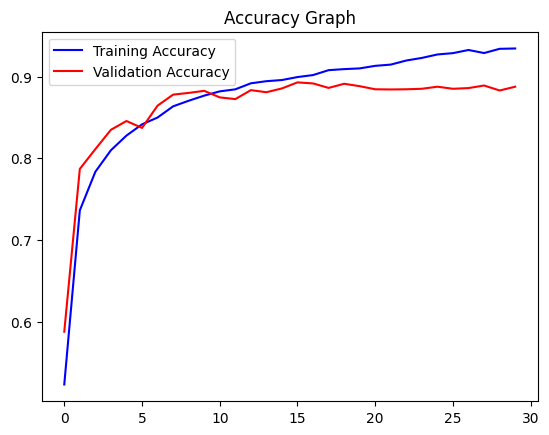

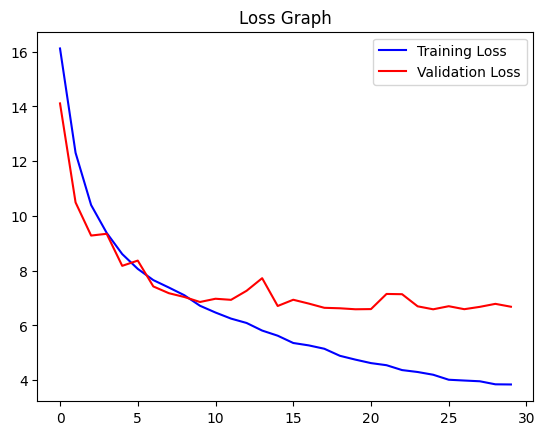

In [22]:
# Okay, Now, see the model results. Firstly check the gender status

# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#for loss function
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Prediction with Test Data

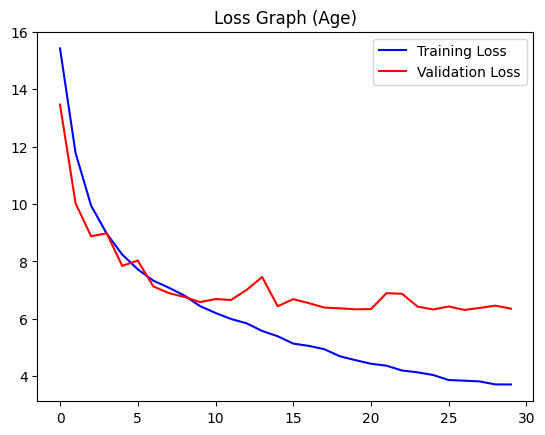

In [23]:
# Plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph (Age)')
plt.legend()
plt.show()

## Prediction

In [24]:
def predict(image_index):
    image_index = image_index
    print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
    # Predict from model
    pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
    plt.axis('off')
    plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gender: Female Predicted Age: 2


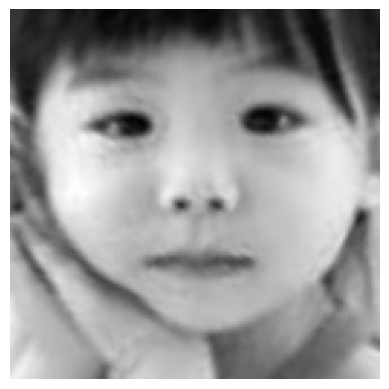

In [25]:
predict(100)

Original Gender: Male Original Age: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Gender: Male Predicted Age: 58


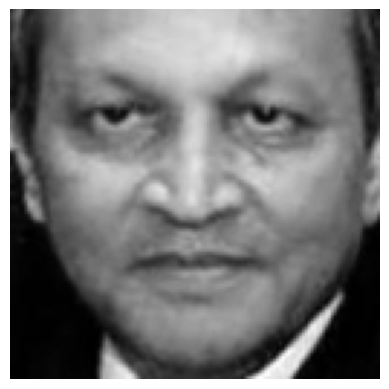

In [26]:
predict(301)

Original Gender: Male Original Age: 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Gender: Male Predicted Age: 34


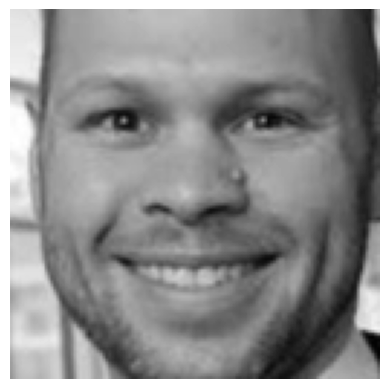

In [27]:
predict(1125)